In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [2]:
# Load your dataset
data = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/final_df.csv')

In [3]:
labels = data['rar']

In [4]:
features = data.drop('rar', axis=1)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os


In [6]:
# Standardize the data
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

### Creating an individual model

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [9]:
# Define and train the model
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model
single_model = create_ann(input_dim=X_train.shape[1])
single_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 29169728.0000 - val_loss: 344367.1562
Epoch 2/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 301928.6562 - val_loss: 226236.1250
Epoch 3/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 211170.6250 - val_loss: 193362.7500
Epoch 4/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - loss: 197623.5000 - val_loss: 185013.7344
Epoch 5/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 180244.0000 - val_loss: 175522.3125
Epoch 6/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step - loss: 159546.0938 - val_loss: 133783.6875
Epoch 7/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 135599.8750 - val_loss: 133214.5781
Epoch 8/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 126956.6797 - val_loss: 126940.4062
Epoch 9/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 128092.2500 - val_loss: 122773.7812
Epoch 10/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step - loss: 130781.7031 - val_loss:

### Creating the hybrid model

In [11]:
from sklearn.cluster import KMeans

In [12]:
features_km = pd.DataFrame(features)
features_km['rar'] = labels

In [13]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the dataset
features_km['cluster'] = clusters

In [14]:
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train ANN on a specific cluster
def train_ann_on_cluster(cluster_data):
    features = cluster_data.drop(['rar', 'cluster'], axis=1)
    labels = cluster_data['rar']
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    ann = create_ann(input_dim=features.shape[1])
    ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    return ann

In [15]:
# Train an ANN for each cluster
ann_models = {}
for cluster in range(3):
    cluster_data = features_km[features_km['cluster'] == cluster]
    ann_models[cluster] = train_ann_on_cluster(cluster_data)

Epoch 1/50


C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 394819872.0000 - val_loss: 33797020.0000
Epoch 2/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26258796.0000 - val_loss: 10479306.0000
Epoch 3/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9207810.0000 - val_loss: 4901892.5000
Epoch 4/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4831630.0000 - val_loss: 3151145.5000
Epoch 5/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3123844.0000 - val_loss: 2422551.7500
Epoch 6/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2279778.7500 - val_loss: 1969260.7500
Epoch 7/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1925468.2500 - val_loss: 1678465.0000
Epoch 8/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1554622.7500 - val_loss: 1449333.5000
Epoch 9/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1515403.2500 - val_loss: 1293114.8750
Epoch 10/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1348454.1250 - val_loss: 1190066.1250
Epoch 11/50
645/645 ━━━━━

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 15784095.0000 - val_loss: 231959.4531
Epoch 2/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 202611.4531 - val_loss: 148038.2031
Epoch 3/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 126126.0938 - val_loss: 102725.8516
Epoch 4/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 95029.4219 - val_loss: 73748.4531
Epoch 5/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 68712.1953 - val_loss: 68291.1328
Epoch 6/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 63469.8008 - val_loss: 60982.8594
Epoch 7/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 63815.5977 - val_loss: 56090.1172
Epoch 8/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 56614.9961 - val_loss: 56438.1836
Epoch 9/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 58098.6211 - val_loss: 55337.7383
Epoch 10/50
22511/22511 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 53307.9141 - val_loss: 54947.9570
E

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10547/10547 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 141427104.0000 - val_loss: 1788205.3750
Epoch 2/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 1432076.3750 - val_loss: 1056500.7500
Epoch 3/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 946207.9375 - val_loss: 881767.5000
Epoch 4/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 795397.2500 - val_loss: 769546.3750
Epoch 5/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 702622.8125 - val_loss: 640318.2500
Epoch 6/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 582325.1250 - val_loss: 517361.5000
Epoch 7/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 488641.7812 - val_loss: 474331.7188
Epoch 8/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 416809.9062 - val_loss: 446852.4375
Epoch 9/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 389267.9375 - val_loss: 393599.1250
Epoch 10/50
10547/10547 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 364644.0625 - val_loss: 362022

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Assign each sample in the test set to a cluster
test_clusters = kmeans.predict(X_test)

# Initialize an array to hold the predictions
combined_predictions = np.zeros_like(y_test)

In [18]:
# Make predictions using the corresponding model for each cluster
for cluster in range(3):
    cluster_indices = np.where(test_clusters == cluster)[0]
    if len(cluster_indices) > 0:
        X_cluster = X_test[cluster_indices]  # Use NumPy indexing
        model = ann_models[cluster]
        combined_predictions[cluster_indices] = model.predict(X_cluster).flatten()

# Evaluate the combined performance
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_rmse = np.sqrt(combined_mse)
combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_r2 = r2_score(y_test, combined_predictions)

print(f'Combined Model MSE: {combined_mse}')
print(f'Combined Model RMSE: {combined_rmse}')
print(f'Combined Model MAE: {combined_mae}')
print(f'Combined Model R²: {combined_r2}')

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
2638/2638 ━━━━━━━━━━━━━━━━━━━━ 3s 991us/step
Combined Model MSE: 82405.15245603336
Combined Model RMSE: 287.06297646341187
Combined Model MAE: 109.5761279781523
Combined Model R²: 0.9991039389375662


In [19]:
# Make predictions using the single model
single_predictions = single_model.predict(X_test).flatten()

# Evaluate the performance
single_mse = mean_squared_error(y_test, single_predictions)
single_rmse = np.sqrt(single_mse)
single_mae = mean_absolute_error(y_test, single_predictions)
single_r2 = r2_score(y_test, single_predictions)

print(f'Single Model MSE: {single_mse}')
print(f'Single Model RMSE: {single_rmse}')
print(f'Single Model MAE: {single_mae}')
print(f'Single Model R²: {single_r2}')

8426/8426 ━━━━━━━━━━━━━━━━━━━━ 8s 930us/step
Single Model MSE: 79860.400643655
Single Model RMSE: 282.5958255948856
Single Model MAE: 123.22853169901775
Single Model R²: 0.999131610180743


In [20]:
#create a dataframe of scores
performance_metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Single Model': [single_mse, single_rmse, single_mae, single_r2],
    'Combined Model': [combined_mse, combined_rmse, combined_mae, combined_r2]
})

In [21]:
# Export the performance metrics to a CSV file
performance_metrics.to_csv('performance_metrics_Original_ANN.csv', index=False)

In [22]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = single_model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 33: Importance 5.3442606925964355
Feature 4: Importance 4.67896842956543
Feature 21: Importance 3.6800696849823
Feature 16: Importance 3.2387373447418213
Feature 45: Importance 3.0146641731262207


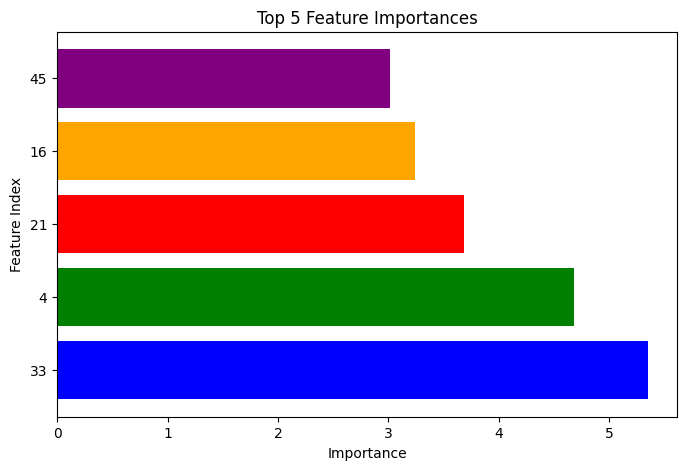

In [23]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [65]:
colnames = data.columns[[33, 4, 21, 16, 45]]
print(colnames)

Index(['recoveries', 'collection_recovery_fee', 'loan_amnt', 'installment',
       'total_rec_prncp'],
      dtype='object')


In [24]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 33: Importance 4.829290390014648
Feature 4: Importance 4.304861068725586
Feature 21: Importance 3.934108018875122
Feature 47: Importance 3.6284866333007812
Feature 3: Importance 3.616558313369751


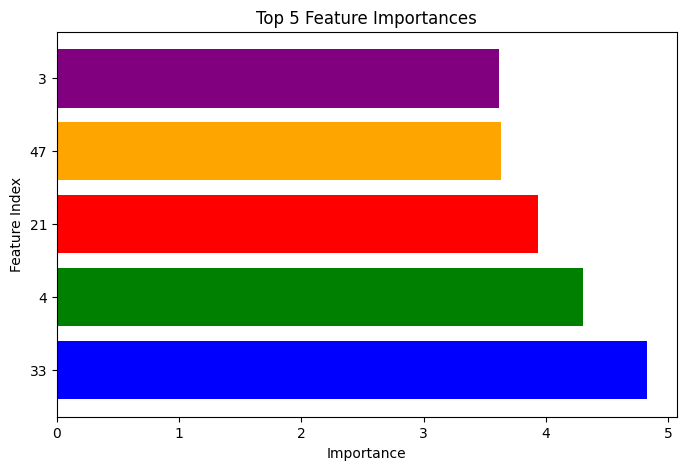

In [25]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [67]:
colnames = data.columns[[33, 4, 21, 47, 3]]
print(colnames)

Index(['recoveries', 'collection_recovery_fee', 'loan_amnt',
       'application_type_OrdinalEncoded', 'annual_inc_joint'],
      dtype='object')
